In [27]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predicta-1-0-predict-the-unpredictable/submission_key.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable/sample_submission.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable/historical_weather.csv


In [28]:
historical_data=pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable/historical_weather.csv', parse_dates=['date'])
sample_submission=pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable/sample_submission.csv')
submission_key=pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable/submission_key.csv', parse_dates=['date'])

In [29]:
historical_data.shape

(182338, 9)

In [54]:
weather_data=historical_data.groupby(['city_id','date']).mean().reset_index()
weather_data.head(3)

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8


In [55]:
weather_data.shape

(182338, 9)

In [56]:
weather_data['year']=weather_data['date'].dt.year
weather_data['month']=weather_data['date'].dt.month
weather_data['day']=weather_data['date'].dt.day
weather_data['week']=weather_data['date'].dt.isocalendar().week
weather_data['quarter']=weather_data['date'].dt.quarter
weather_data['dayofweek']=weather_data['date'].dt.dayofweek

In [57]:
weather_data.dtypes

city_id                       object
date                  datetime64[ns]
avg_temp_c                   float64
min_temp_c                   float64
max_temp_c                   float64
precipitation_mm             float64
snow_depth_mm                float64
avg_wind_dir_deg             float64
avg_wind_speed_kmh           float64
year                           int32
month                          int32
day                            int32
week                          UInt32
quarter                        int32
dayofweek                      int32
dtype: object

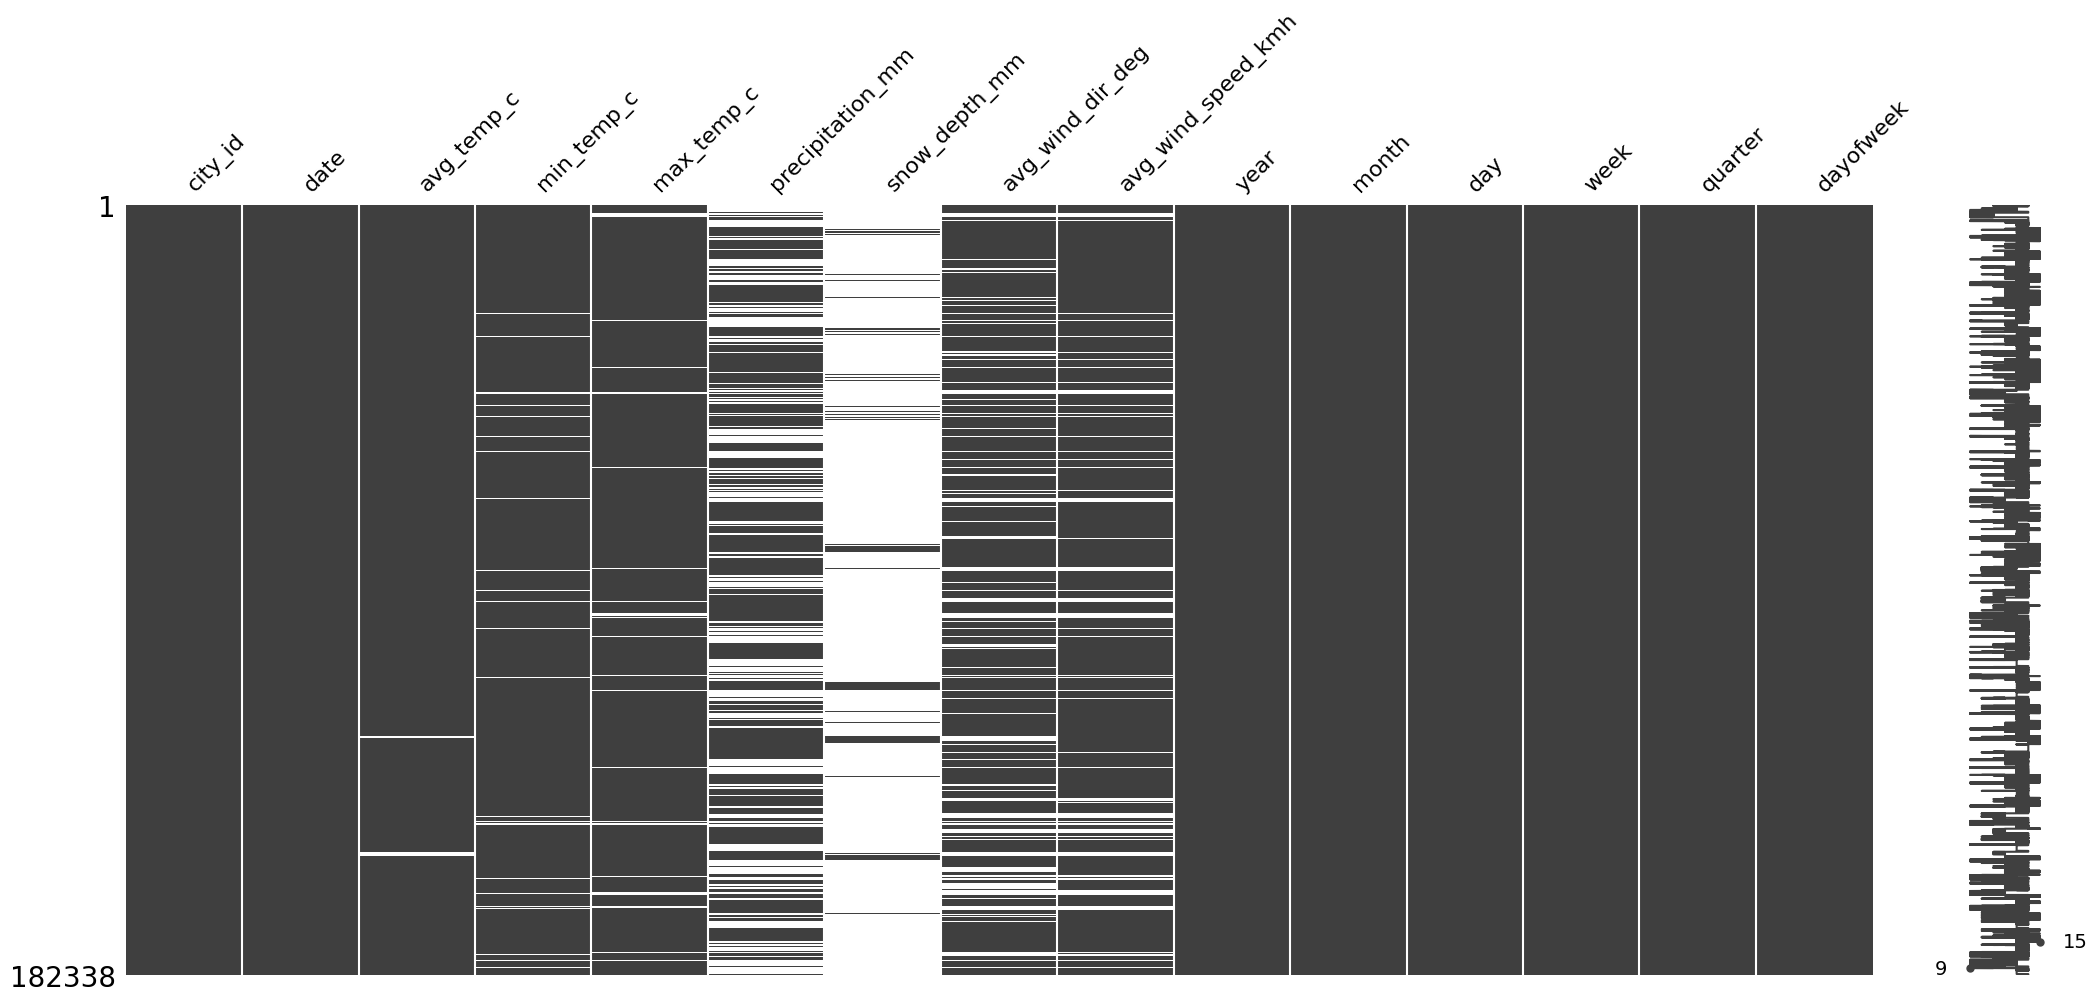

In [58]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values before imputation
msno.matrix(weather_data)
plt.show()

In [59]:
filled_weather_data=weather_data.copy()

In [60]:
mean_precipitation = filled_weather_data.groupby(['city_id','month','day'])['precipitation_mm'].mean()
mean_snow_depth=filled_weather_data.groupby(['city_id','month','day'])['snow_depth_mm'].mean()
mean_avg_temp=filled_weather_data.groupby(['city_id','month','day'])['avg_temp_c'].mean()
mean_min_temp=filled_weather_data.groupby(['city_id','month','day'])['min_temp_c'].mean()
mean_max_temp=filled_weather_data.groupby(['city_id','month','day'])['max_temp_c'].mean()
mean_avg_wind_dir=filled_weather_data.groupby(['city_id','month','day'])['avg_wind_dir_deg'].mean()
mean_avg_wind_speed=filled_weather_data.groupby(['city_id','month','day'])[ 'avg_wind_speed_kmh'].mean()

In [61]:
filled_weather_data.columns

Index(['city_id', 'date', 'avg_temp_c', 'min_temp_c', 'max_temp_c',
       'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'year', 'month', 'day', 'week', 'quarter',
       'dayofweek'],
      dtype='object')

In [62]:
mean_precipitation_dict = mean_precipitation.to_dict()
mean_snow_depth_dict = mean_snow_depth.to_dict()
mean_avg_temp_dict = mean_avg_temp.to_dict()
mean_min_temp_dict = mean_min_temp.to_dict()
mean_max_temp_dict = mean_max_temp.to_dict()
mean_avg_wind_dir_dict = mean_avg_wind_dir.to_dict()
mean_avg_wind_speed_dict = mean_avg_wind_speed.to_dict()

In [63]:
filled_weather_data['precipitation_mm'] = filled_weather_data.apply(lambda row: mean_precipitation_dict.get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['precipitation_mm']) else row['precipitation_mm'], axis=1)
filled_weather_data['snow_depth_mm'] = filled_weather_data.apply(lambda row: mean_snow_depth_dict.get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['snow_depth_mm']) else row['snow_depth_mm'], axis=1)
filled_weather_data['avg_temp_c'] = filled_weather_data.apply(lambda row: mean_avg_temp_dict.get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['avg_temp_c']) else row['avg_temp_c'], axis=1)
filled_weather_data['min_temp_c'] = filled_weather_data.apply(lambda row: mean_min_temp_dict.get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['min_temp_c']) else row['min_temp_c'], axis=1)
filled_weather_data['max_temp_c'] = filled_weather_data.apply(lambda row: mean_max_temp_dict.get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['max_temp_c']) else row['max_temp_c'], axis=1)
filled_weather_data['avg_wind_dir_deg'] = filled_weather_data.apply(lambda row: mean_avg_wind_dir_dict.get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['avg_wind_dir_deg']) else row['avg_wind_dir_deg'], axis=1)
filled_weather_data['avg_wind_speed_kmh'] = filled_weather_data.apply(lambda row: mean_avg_wind_speed_dict .get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['avg_wind_speed_kmh']) else row['avg_wind_speed_kmh'], axis=1)

In [64]:
filled_weather_data.isna().sum()

city_id                    0
date                       0
avg_temp_c                 1
min_temp_c                 3
max_temp_c                 5
precipitation_mm       16183
snow_depth_mm         161211
avg_wind_dir_deg         707
avg_wind_speed_kmh        14
year                       0
month                      0
day                        0
week                       0
quarter                    0
dayofweek                  0
dtype: int64

In [65]:
filled_weather_data=filled_weather_data.fillna(method='ffill')
filled_weather_data.isna().sum()

/tmp/ipykernel_33/3979028495.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_weather_data=filled_weather_data.fillna(method='ffill')


city_id                  0
date                     0
avg_temp_c               0
min_temp_c               0
max_temp_c               0
precipitation_mm        33
snow_depth_mm         5452
avg_wind_dir_deg         0
avg_wind_speed_kmh       0
year                     0
month                    0
day                      0
week                     0
quarter                  0
dayofweek                0
dtype: int64

In [66]:
filled_weather_data=filled_weather_data.fillna(0)
filled_weather_data.isna().sum()

city_id               0
date                  0
avg_temp_c            0
min_temp_c            0
max_temp_c            0
precipitation_mm      0
snow_depth_mm         0
avg_wind_dir_deg      0
avg_wind_speed_kmh    0
year                  0
month                 0
day                   0
week                  0
quarter               0
dayofweek             0
dtype: int64

In [67]:
filled_weather_data.head()

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,year,month,day,week,quarter,dayofweek
0,C001,2014-01-01,6.6,-1.4,11.6,0.0,0.0,168.00,6.2,2014,1,1,1,1,2
1,C001,2014-01-02,9.3,6.3,13.3,0.0,0.0,155.00,10.0,2014,1,2,1,1,3
2,C001,2014-01-03,7.6,1.9,14.0,0.0,0.0,211.00,5.8,2014,1,3,1,1,4
3,C001,2014-01-04,7.6,3.9,13.3,0.0,0.0,291.00,11.3,2014,1,4,1,1,5
4,C001,2014-01-05,8.6,0.5,16.9,0.0,0.0,245.25,5.0,2014,1,5,1,1,6


In [68]:
filled_weather_data['Q1_temp_c'] = filled_weather_data['min_temp_c'] + (filled_weather_data['max_temp_c'] - filled_weather_data['min_temp_c']) / 4
filled_weather_data['Q3_temp_c'] = filled_weather_data['min_temp_c'] + 3 * (filled_weather_data['max_temp_c'] - filled_weather_data['min_temp_c']) / 4
filled_weather_data['mean_temp_c'] = filled_weather_data[['min_temp_c', 'max_temp_c']].mean(axis=1)

In [69]:
# Create rolling features with a window of 7 days (1 week)
filled_weather_data['min_temp_c_roll_mean_7d'] = filled_weather_data.groupby(['city_id','year','month'])['min_temp_c'].transform(lambda x: x.rolling(window=7).mean())
filled_weather_data['max_temp_c_roll_mean_7d'] = filled_weather_data.groupby(['city_id','year','month'])['max_temp_c'].transform(lambda x: x.rolling(window=7).mean())
filled_weather_data['min_temp_c_roll_std_7d'] = filled_weather_data.groupby(['city_id','year','month'])['min_temp_c'].transform(lambda x: x.rolling(window=7).std())
filled_weather_data['max_temp_c_roll_std_7d'] = filled_weather_data.groupby(['city_id','year','month'])['max_temp_c'].transform(lambda x: x.rolling(window=7).std())

In [70]:
# Create rolling features with a window of 3 days
filled_weather_data['min_temp_c_roll_mean_3d'] = filled_weather_data.groupby(['city_id','year','month'])['min_temp_c'].transform(lambda x: x.rolling(window=3).mean())
filled_weather_data['max_temp_c_roll_mean_3d'] = filled_weather_data.groupby(['city_id','year','month'])['max_temp_c'].transform(lambda x: x.rolling(window=3).mean())
filled_weather_data['min_temp_c_roll_std_3d'] = filled_weather_data.groupby(['city_id','year','month'])['min_temp_c'].transform(lambda x: x.rolling(window=3).std())
filled_weather_data['max_temp_c_roll_std_3d'] = filled_weather_data.groupby(['city_id','year','month'])['max_temp_c'].transform(lambda x: x.rolling(window=3).std())

In [73]:
filled_weather_data['min_temp_c_lag1'] = filled_weather_data.groupby(['city_id','year','month'])['min_temp_c'].shift(1)
filled_weather_data['max_temp_c_lag1'] = filled_weather_data.groupby(['city_id','year','month'])['max_temp_c'].shift(1)
filled_weather_data['min_temp_c_lag2'] = filled_weather_data.groupby(['city_id','year','month'])['min_temp_c'].shift(2)
filled_weather_data['max_temp_c_lag2'] = filled_weather_data.groupby(['city_id','year','month'])['max_temp_c'].shift(2)

In [74]:
filled_weather_data.isna().sum()

city_id                        0
date                           0
avg_temp_c                     0
min_temp_c                     0
max_temp_c                     0
precipitation_mm               0
snow_depth_mm                  0
avg_wind_dir_deg               0
avg_wind_speed_kmh             0
year                           0
month                          0
day                            0
week                           0
quarter                        0
dayofweek                      0
Q1_temp_c                      0
Q3_temp_c                      0
mean_temp_c                    0
min_temp_c_roll_mean_7d    36000
max_temp_c_roll_mean_7d    36000
min_temp_c_roll_std_7d     36000
max_temp_c_roll_std_7d     36000
min_temp_c_roll_mean_3d    12000
max_temp_c_roll_mean_3d    12000
min_temp_c_roll_std_3d     12000
max_temp_c_roll_std_3d     12000
min_temp_c_lag1             6000
max_temp_c_lag1             6000
min_temp_c_lag2            12000
max_temp_c_lag2            12000
dtype: int

In [76]:
filled_weather_data=filled_weather_data.fillna(0)
# filled_weather_data.describe()

In [77]:
filled_weather_data.columns

Index(['city_id', 'date', 'avg_temp_c', 'min_temp_c', 'max_temp_c',
       'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'year', 'month', 'day', 'week', 'quarter',
       'dayofweek', 'Q1_temp_c', 'Q3_temp_c', 'mean_temp_c',
       'min_temp_c_roll_mean_7d', 'max_temp_c_roll_mean_7d',
       'min_temp_c_roll_std_7d', 'max_temp_c_roll_std_7d',
       'min_temp_c_roll_mean_3d', 'max_temp_c_roll_mean_3d',
       'min_temp_c_roll_std_3d', 'max_temp_c_roll_std_3d', 'min_temp_c_lag1',
       'max_temp_c_lag1', 'min_temp_c_lag2', 'max_temp_c_lag2'],
      dtype='object')

In [78]:
from sklearn.preprocessing import StandardScaler

continuous_features = ['min_temp_c', 'max_temp_c', 'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh', 'Q1_temp_c', 'Q3_temp_c', 'mean_temp_c']

scaler = StandardScaler()

filled_weather_data[continuous_features] = scaler.fit_transform(filled_weather_data[continuous_features])

In [79]:
# filled_weather_data['quarter'].max()

In [80]:
# Encode month using sine and cosine transformations
filled_weather_data['month_sin'] = np.sin(2 * np.pi * filled_weather_data['month'] / 12)
filled_weather_data['month_cos'] = np.cos(2 * np.pi * filled_weather_data['month'] / 12)

In [81]:
filled_weather_data['day_sin'] = np.sin(2 * np.pi * filled_weather_data['dayofweek'] / 6)
filled_weather_data['day_cos'] = np.cos(2 * np.pi * filled_weather_data['dayofweek'] / 6)

In [82]:
filled_weather_data['week_sin'] = np.sin(2 * np.pi * filled_weather_data['week'] / 53)
filled_weather_data['week_cos'] = np.cos(2 * np.pi * filled_weather_data['week'] / 53)

In [83]:
filled_weather_data['quarter_sin'] = np.sin(2 * np.pi * filled_weather_data['quarter'] / 4)
filled_weather_data['quarter_cos'] = np.cos(2 * np.pi * filled_weather_data['quarter'] / 4)

In [84]:
filled_weather_data.columns

Index(['city_id', 'date', 'avg_temp_c', 'min_temp_c', 'max_temp_c',
       'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'year', 'month', 'day', 'week', 'quarter',
       'dayofweek', 'Q1_temp_c', 'Q3_temp_c', 'mean_temp_c',
       'min_temp_c_roll_mean_7d', 'max_temp_c_roll_mean_7d',
       'min_temp_c_roll_std_7d', 'max_temp_c_roll_std_7d',
       'min_temp_c_roll_mean_3d', 'max_temp_c_roll_mean_3d',
       'min_temp_c_roll_std_3d', 'max_temp_c_roll_std_3d', 'min_temp_c_lag1',
       'max_temp_c_lag1', 'min_temp_c_lag2', 'max_temp_c_lag2', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'week_sin', 'week_cos',
       'quarter_sin', 'quarter_cos'],
      dtype='object')

In [85]:
encoded_weather_data=pd.get_dummies(filled_weather_data,columns=['city_id'],dtype='int')
encoded_weather_data.head()

,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,year,month,...,city_id_C103,city_id_C104,city_id_C105,city_id_C106,city_id_C107,city_id_C108,city_id_C109,city_id_C110,city_id_C111,city_id_C112
0,2014-01-01,6.6,-1.613975,-1.188280,-0.345415,-0.277416,-0.070289,-0.820245,2014,1,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-02,9.3,-0.842420,-1.024502,-0.345415,-0.277416,-0.198620,-0.188412,2014,1,...,0,0,0,0,0,0,0,0,0,0
2,2014-01-03,7.6,-1.283309,-0.957064,-0.345415,-0.277416,0.354190,-0.886754,2014,1,...,0,0,0,0,0,0,0,0,0,0
3,2014-01-04,7.6,-1.082905,-1.024502,-0.345415,-0.277416,1.143919,0.027741,2014,1,...,0,0,0,0,0,0,0,0,0,0
4,2014-01-05,8.6,-1.423591,-0.677678,-0.345415,-0.277416,0.692293,-1.019772,2014,1,...,0,0,0,0,0,0,0,0,0,0


In [91]:
data=encoded_weather_data.drop(['year','month','day','week','quarter','dayofweek'],axis=1)

In [92]:
train_data = data[data['date'] < '2018-01-01']
val_data = data[data['date'] >= '2018-01-01']

In [93]:
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

In [94]:
X_train=train_data.drop(['date','avg_temp_c'],axis=1)
y_train=train_data['avg_temp_c']
X_val=val_data.drop(['date','avg_temp_c'],axis=1)
y_val=val_data['avg_temp_c']

In [95]:
X_train.shape

(145846, 129)

In [96]:
X_train.columns

Index(['min_temp_c', 'max_temp_c', 'precipitation_mm', 'snow_depth_mm',
       'avg_wind_dir_deg', 'avg_wind_speed_kmh', 'Q1_temp_c', 'Q3_temp_c',
       'mean_temp_c', 'min_temp_c_roll_mean_7d',
       ...
       'city_id_C103', 'city_id_C104', 'city_id_C105', 'city_id_C106',
       'city_id_C107', 'city_id_C108', 'city_id_C109', 'city_id_C110',
       'city_id_C111', 'city_id_C112'],
      dtype='object', length=129)

In [97]:
catboost=CatBoostRegressor(logging_level='Silent')
catboost.fit(X_train,y_train)
cat_y_pred=catboost.predict(X_val)
print("RMSE for CatBoost Regression: ",np.sqrt(mean_squared_error(y_val, cat_y_pred)))

RMSE for CatBoost Regression:  0.9336117379339849


In [100]:
import optuna

def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }
    catboost=CatBoostRegressor(**params, silent=True)
    catboost.fit(X_train,y_train)
    cat_y_pred=catboost.predict(X_val)
    rmse=np.sqrt(mean_squared_error(y_val,cat_y_pred))
    return rmse

In [101]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-06-23 11:32:13,477] A new study created in memory with name: no-name-69e21b25-ac77-4782-b390-a5f98e5c34b8
[I 2024-06-23 11:32:19,043] Trial 0 finished with value: 1.0513311041450075 and parameters: {'learning_rate': 0.063084852297261, 'depth': 1, 'subsample': 0.17705983624612937, 'colsample_bylevel': 0.5883228588395045, 'min_data_in_leaf': 48}. Best is trial 0 with value: 1.0513311041450075.
[I 2024-06-23 11:32:30,886] Trial 1 finished with value: 1.0765801839326143 and parameters: {'learning_rate': 0.006473040266705798, 'depth': 2, 'subsample': 0.8547842830743285, 'colsample_bylevel': 0.5511824344824444, 'min_data_in_leaf': 49}. Best is trial 0 with value: 1.0513311041450075.
[I 2024-06-23 11:34:18,638] Trial 2 finished with value: 0.9366384858924234 and parameters: {'learning_rate': 0.017366579837421885, 'depth': 10, 'subsample': 0.949694402477766, 'colsample_bylevel': 0.9161606799096903, 'min_data_in_leaf': 75}. Best is trial 2 with value: 0.9366384858924234.
[I 2024-06-23 1

In [102]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)


Best hyperparameters: {'learning_rate': 0.0671936847793808, 'depth': 9, 'subsample': 0.7091702204952393, 'colsample_bylevel': 0.6188233710036666, 'min_data_in_leaf': 42}
Best RMSE: 0.922815286778164


In [103]:
cat_params={'learning_rate': 0.0671936847793808, 'depth': 9, 'subsample': 0.7091702204952393, 'colsample_bylevel': 0.6188233710036666, 'min_data_in_leaf': 42}

In [104]:
catboost=CatBoostRegressor(**cat_params,logging_level='Silent')
catboost.fit(X_train,y_train)
cat_y_pred=catboost.predict(X_val)
print("RMSE for CatBoost Regression: ",np.sqrt(mean_squared_error(y_val, cat_y_pred)))

RMSE for CatBoost Regression:  0.922815286778164


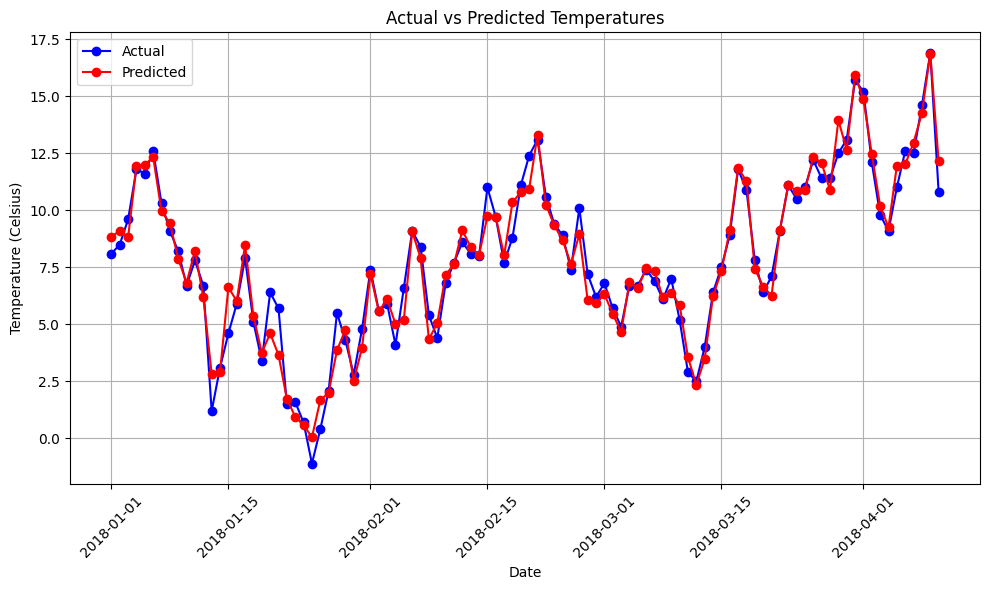

In [106]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(val_data['date'][:100], y_val[:100], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(val_data['date'][:100], cat_y_pred[:100], marker='o', linestyle='-', color='r', label='Predicted')
plt.title('Actual vs Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [107]:
# Get feature importance
feature_importances = catboost.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
top_features = importance_df[importance_df['importance'] > 0.5]['feature'].tolist()
top_features

['min_temp_c',
 'max_temp_c',
 'Q1_temp_c',
 'Q3_temp_c',
 'mean_temp_c',
 'max_temp_c_roll_mean_7d',
 'min_temp_c_roll_mean_3d',
 'max_temp_c_roll_mean_3d',
 'min_temp_c_lag1',
 'max_temp_c_lag1',
 'min_temp_c_lag2',
 'week_cos',
 'city_id_C097']

In [108]:
importance_df

,feature,importance
0,min_temp_c,2.944384
1,max_temp_c,8.549655
2,precipitation_mm,0.339922
3,snow_depth_mm,0.299932
4,avg_wind_dir_deg,0.319986
...,...,...
124,city_id_C108,0.008141
125,city_id_C109,0.014465
126,city_id_C110,0.012889
127,city_id_C111,0.000670


In [109]:
submission_key.head()

,submission_ID,city_id,date
0,1,C001,2019-01-01
1,2,C001,2019-01-02
2,3,C001,2019-01-03
3,4,C001,2019-01-04
4,5,C001,2019-01-05


In [110]:
sample_submission.head(3)

,submission_ID,avg_temp_c
0,1,NaN
1,2,NaN
2,3,NaN


In [111]:
sub_data=submission_key.copy()

In [112]:
sub_data['year']=sub_data['date'].dt.year
sub_data['month']=sub_data['date'].dt.month
sub_data['day']=sub_data['date'].dt.day
sub_data['week']=sub_data['date'].dt.isocalendar().week
sub_data['quarter']=sub_data['date'].dt.quarter
sub_data['dayofweek']=sub_data['date'].dt.dayofweek

In [113]:
data_to_included=weather_data.drop(['date','avg_temp_c','year','week','quarter','dayofweek'],axis=1)

In [114]:
data_agg = data_to_included.groupby(['city_id','month','day']).mean().reset_index()
data_agg

,city_id,month,day,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
0,C001,1,1,-0.20,14.56,NaN,NaN,117.00,7.44
1,C001,1,2,0.12,14.80,NaN,NaN,134.60,7.48
2,C001,1,3,1.90,14.62,NaN,NaN,211.00,8.06
3,C001,1,4,3.38,12.66,NaN,NaN,155.00,8.72
4,C001,1,5,1.60,14.24,NaN,NaN,245.25,9.34
...,...,...,...,...,...,...,...,...,...
36595,C112,12,27,17.18,28.60,0.00,NaN,62.60,12.86
36596,C112,12,28,17.12,28.60,0.00,NaN,66.40,12.04
36597,C112,12,29,17.62,28.10,0.00,NaN,88.60,11.98
36598,C112,12,30,17.38,27.88,0.95,NaN,109.00,11.90


In [115]:
submission_data=pd.merge(sub_data,data_agg, on=['city_id','month','day'])
submission_data.head(5)

,submission_ID,city_id,date,year,month,day,week,quarter,dayofweek,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
0,1,C001,2019-01-01,2019,1,1,1,1,1,-0.20,14.56,NaN,NaN,117.00,7.44
1,2,C001,2019-01-02,2019,1,2,1,1,2,0.12,14.80,NaN,NaN,134.60,7.48
2,3,C001,2019-01-03,2019,1,3,1,1,3,1.90,14.62,NaN,NaN,211.00,8.06
3,4,C001,2019-01-04,2019,1,4,1,1,4,3.38,12.66,NaN,NaN,155.00,8.72
4,5,C001,2019-01-05,2019,1,5,1,1,5,1.60,14.24,NaN,NaN,245.25,9.34


In [116]:
submission_data.shape

(700, 15)

In [280]:
# weather_data['date'].max()

In [281]:
submission_data['date'].max()

Timestamp('2019-01-07 00:00:00')

In [117]:
set(weather_data.columns)-set(submission_data.columns)

{'avg_temp_c'}

In [118]:
mean_precipitation = submission_data.groupby(['city_id','month','day'])['precipitation_mm'].mean()
mean_snow_depth=submission_data.groupby(['city_id','month','day'])['snow_depth_mm'].mean()
# mean_avg_temp=submission_data.groupby(['city_id','month','day'])['avg_temp_c'].mean()
mean_min_temp=submission_data.groupby(['city_id','month','day'])['min_temp_c'].mean()
mean_max_temp=submission_data.groupby(['city_id','month','day'])['max_temp_c'].mean()
mean_avg_wind_dir=submission_data.groupby(['city_id','month','day'])['avg_wind_dir_deg'].mean()
mean_avg_wind_speed=submission_data.groupby(['city_id','month','day'])[ 'avg_wind_speed_kmh'].mean()

In [119]:
mean_precipitation_dict = mean_precipitation.to_dict()
mean_snow_depth_dict = mean_snow_depth.to_dict()
# mean_avg_temp_dict = mean_avg_temp.to_dict()
mean_min_temp_dict = mean_min_temp.to_dict()
mean_max_temp_dict = mean_max_temp.to_dict()
mean_avg_wind_dir_dict = mean_avg_wind_dir.to_dict()
mean_avg_wind_speed_dict = mean_avg_wind_speed.to_dict()

In [120]:
submission_data['precipitation_mm'] = submission_data.apply(lambda row: mean_precipitation_dict.get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['precipitation_mm']) else row['precipitation_mm'], axis=1)
submission_data['snow_depth_mm'] =submission_data.apply(lambda row: mean_snow_depth_dict.get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['snow_depth_mm']) else row['snow_depth_mm'], axis=1)
# filled_weather_data['avg_temp_c'] = filled_weather_data.apply(lambda row: mean_avg_temp_dict.get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['avg_temp_c']) else row['avg_temp_c'], axis=1)
submission_data['min_temp_c'] = submission_data.apply(lambda row: mean_min_temp_dict.get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['min_temp_c']) else row['min_temp_c'], axis=1)
submission_data['max_temp_c'] = submission_data.apply(lambda row: mean_max_temp_dict.get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['max_temp_c']) else row['max_temp_c'], axis=1)
submission_data['avg_wind_dir_deg'] = submission_data.apply(lambda row: mean_avg_wind_dir_dict.get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['avg_wind_dir_deg']) else row['avg_wind_dir_deg'], axis=1)
submission_data['avg_wind_speed_kmh'] = submission_data.apply(lambda row: mean_avg_wind_speed_dict .get((row['city_id'],row['month'],row['day'])) if pd.isnull(row['avg_wind_speed_kmh']) else row['avg_wind_speed_kmh'], axis=1)

In [121]:
submission_data=submission_data.fillna(method='ffill')
submission_data.isna().sum()

/tmp/ipykernel_33/2390890758.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  submission_data=submission_data.fillna(method='ffill')


submission_ID          0
city_id                0
date                   0
year                   0
month                  0
day                    0
week                   0
quarter                0
dayofweek              0
min_temp_c             0
max_temp_c             0
precipitation_mm       7
snow_depth_mm         21
avg_wind_dir_deg       0
avg_wind_speed_kmh     0
dtype: int64

In [122]:
submission_data=submission_data.fillna(0)
submission_data.isna().sum()

submission_ID         0
city_id               0
date                  0
year                  0
month                 0
day                   0
week                  0
quarter               0
dayofweek             0
min_temp_c            0
max_temp_c            0
precipitation_mm      0
snow_depth_mm         0
avg_wind_dir_deg      0
avg_wind_speed_kmh    0
dtype: int64

In [123]:
submission_data['Q1_temp_c'] = submission_data['min_temp_c'] + (submission_data['max_temp_c'] - submission_data['min_temp_c']) / 4
submission_data['Q3_temp_c'] = submission_data['min_temp_c'] + 3 * (submission_data['max_temp_c'] - submission_data['min_temp_c']) / 4
submission_data['mean_temp_c'] =submission_data[['min_temp_c', 'max_temp_c']].mean(axis=1)

In [127]:
submission_data['min_temp_c_lag1'] = submission_data.groupby(['city_id','year','month'])['min_temp_c'].shift(1)
submission_data['max_temp_c_lag1'] = submission_data.groupby(['city_id','year','month'])['max_temp_c'].shift(1)
submission_data['min_temp_c_lag2'] = submission_data.groupby(['city_id','year','month'])['min_temp_c'].shift(2)
submission_data['max_temp_c_lag2'] = submission_data.groupby(['city_id','year','month'])['max_temp_c'].shift(2)

In [124]:
# Create rolling features with a window of 7 days (1 week)
submission_data['min_temp_c_roll_mean_7d'] = submission_data.groupby(['city_id','year','month'])['min_temp_c'].transform(lambda x: x.rolling(window=7).mean())
submission_data['max_temp_c_roll_mean_7d'] = submission_data.groupby(['city_id','year','month'])['max_temp_c'].transform(lambda x: x.rolling(window=7).mean())
submission_data['min_temp_c_roll_std_7d'] = submission_data.groupby(['city_id','year','month'])['min_temp_c'].transform(lambda x: x.rolling(window=7).std())
submission_data['max_temp_c_roll_std_7d'] = submission_data.groupby(['city_id','year','month'])['max_temp_c'].transform(lambda x: x.rolling(window=7).std())

In [126]:
# Create rolling features with a window of 7 days (1 week)
submission_data['min_temp_c_roll_mean_3d'] = submission_data.groupby(['city_id','year','month'])['min_temp_c'].transform(lambda x: x.rolling(window=3).mean())
submission_data['max_temp_c_roll_mean_3d'] = submission_data.groupby(['city_id','year','month'])['max_temp_c'].transform(lambda x: x.rolling(window=3).mean())
submission_data['min_temp_c_roll_std_3d'] = submission_data.groupby(['city_id','year','month'])['min_temp_c'].transform(lambda x: x.rolling(window=3).std())
submission_data['max_temp_c_roll_std_3d'] = submission_data.groupby(['city_id','year','month'])['max_temp_c'].transform(lambda x: x.rolling(window=3).std())

In [129]:
submission_data=submission_data.fillna(0)

In [130]:
continuous_features = ['min_temp_c', 'max_temp_c', 'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh', 'Q1_temp_c', 'Q3_temp_c', 'mean_temp_c']

submission_data[continuous_features] = scaler.fit_transform(submission_data[continuous_features])

In [131]:
# Encode month using sine and cosine transformations
submission_data['month_sin'] = np.sin(2 * np.pi * submission_data['month'] / 12)
submission_data['month_cos'] = np.cos(2 * np.pi * submission_data['month'] / 12)

In [132]:
submission_data['day_sin'] = np.sin(2 * np.pi * submission_data['dayofweek'] / 6)
submission_data['day_cos'] = np.cos(2 * np.pi * submission_data['dayofweek'] / 6)

In [133]:
submission_data['week_sin'] = np.sin(2 * np.pi * submission_data['week'] / 53)
submission_data['week_cos'] = np.cos(2 * np.pi * submission_data['week'] / 53)

In [134]:
submission_data['quarter_sin'] = np.sin(2 * np.pi * submission_data['quarter'] / 4)
submission_data['quarter_cos'] = np.cos(2 * np.pi * submission_data['quarter'] / 4)

In [135]:
submission_data=submission_data.fillna(0)

In [136]:
encoded_sub_data=pd.get_dummies(submission_data,columns=['city_id'],dtype='int')
encoded_sub_data.head()

,submission_ID,date,year,month,day,week,quarter,dayofweek,min_temp_c,max_temp_c,...,city_id_C103,city_id_C104,city_id_C105,city_id_C106,city_id_C107,city_id_C108,city_id_C109,city_id_C110,city_id_C111,city_id_C112
0,1,2019-01-01,2019,1,1,1,1,1,-0.894817,-0.295180,...,0,0,0,0,0,0,0,0,0,0
1,2,2019-01-02,2019,1,2,1,1,2,-0.866509,-0.275388,...,0,0,0,0,0,0,0,0,0,0
2,3,2019-01-03,2019,1,3,1,1,3,-0.709048,-0.290232,...,0,0,0,0,0,0,0,0,0,0
3,4,2019-01-04,2019,1,4,1,1,4,-0.578125,-0.451865,...,0,0,0,0,0,0,0,0,0,0
4,5,2019-01-05,2019,1,5,1,1,5,-0.735586,-0.321569,...,0,0,0,0,0,0,0,0,0,0


In [139]:
fin_data=encoded_sub_data.drop(['month','day','week','year','quarter','dayofweek','date', 'submission_ID'],axis=1)

In [140]:
missing_cols = set(fin_data.columns) - set(X_train.columns)
missing_cols

set()

In [141]:
fin_data.shape,X_train.shape

((700, 129), (145846, 129))

In [142]:
sample_submission['avg_temp_c']=catboost.predict(fin_data)

In [143]:
sample_submission.head(10)

,submission_ID,avg_temp_c
0,1,12.759717
1,2,12.678686
2,3,13.601246
3,4,13.483462
4,5,13.431335
5,6,13.448513
6,7,12.550743
7,8,17.635177
8,9,17.664644
9,10,17.359603


In [144]:
sample_submission.to_csv('sample_submission3.csv', index=False)

------

In [249]:
from skforecast.model_selection import backtesting_forecaster
from skforecast.ForecasterAutoreg import ForecasterAutoreg